# Classification

classification is a supervised learning approach in which the computer program learns from the data input given to it and then uses this learning to classify new observation

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Reading the Data
df = pd.read_csv('plant_iris.csv')
print(df)
iris=df.to_numpy()

     Sepal Length (cm)  Sepal Width (cm)  Target
0                  5.1               3.5       0
1                  4.9               3.0       0
2                  4.7               3.2       0
3                  4.6               3.1       0
4                  5.0               3.6       0
..                 ...               ...     ...
145                6.7               3.0       1
146                6.3               2.5       1
147                6.5               3.0       1
148                6.2               3.4       1
149                5.9               3.0       1

[150 rows x 3 columns]


In [3]:
# Unloading data to X and y
X = np.array(df.iloc[:,0:2])
y = np.array(df.iloc[:,2])
m = len(X)

In [4]:
print(np.shape(X))
print(np.shape(y))

(150, 2)
(150,)


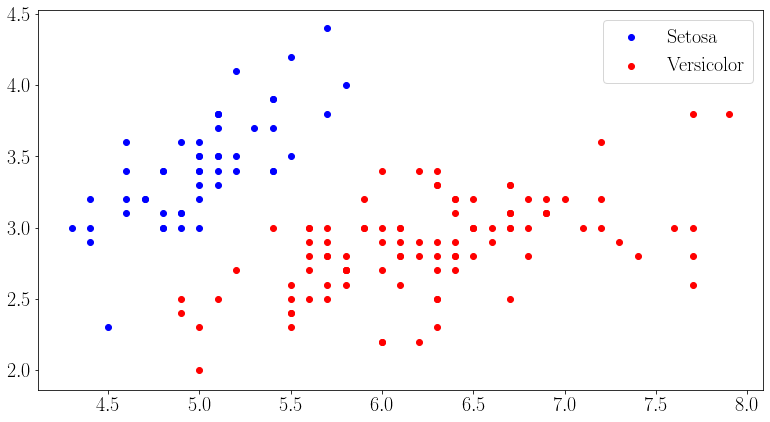

In [5]:
#For visualization purpose
#Don't worry about this code

plt.figure(figsize=(13, 7))

## Config LaTex text rendering in legend
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 20)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Versicolor')
plt.legend();

In [6]:
#To fit the dimension
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
X=add_intercept(X)

# Sigmoid
<img src="sigmoid.png">

In [7]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost Function

<img src="ng_cost_function_logistic.png">



<img src="y1andy2_logistic_function.png">

# simplified cost function

<img src="logistic_cost_function_joined.png">

In [8]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Gradient descent
<img src="gra.jpg">

<img src="gra1.png">

<img src="gradient-descent-1.jpg">

In [12]:
def gradient_descent(X, y,lr,num_iter):   
    # weights initialization
    theta = np.zeros(X.shape[1])
    descent = dict()
        
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
            
        z = np.dot(X,theta)
        h = sigmoid(z)
        loss = cost(h, y)
        

                
        if i % 10 == 0:
            # Add something here to capture the 10 costs so that I can plot it against # of iterations
            descent[i] = loss
            print(f'cost: {loss} \t', f'weights: {theta} \t')
            x_values = [np.min(X[:, 1] ), np.max(X[:, 2] +3)]
            y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
            plt.figure(figsize=(13, 7))


            plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='b', label='Setosa')
            plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='r', label='Versicolor')
            plt.plot(x_values, y_values, label='Decision Boundary')
            plt.xlabel('Marks in 1st Exam')
            plt.ylabel('Marks in 2nd Exam')
            plt.title('iteration : '+str(i))
            plt.legend()
            plt.show()
            

    return descent,theta


In [10]:
X.shape[1]

3

cost: 0.682801866868683 	 weights: [0.03333333 0.2506     0.0772    ] 	


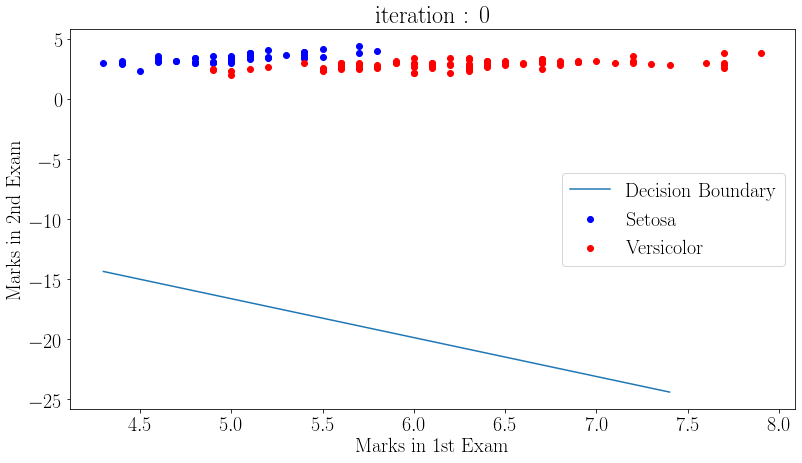

cost: 0.5125764419548847 	 weights: [-0.03334085  0.35345623 -0.35653878] 	


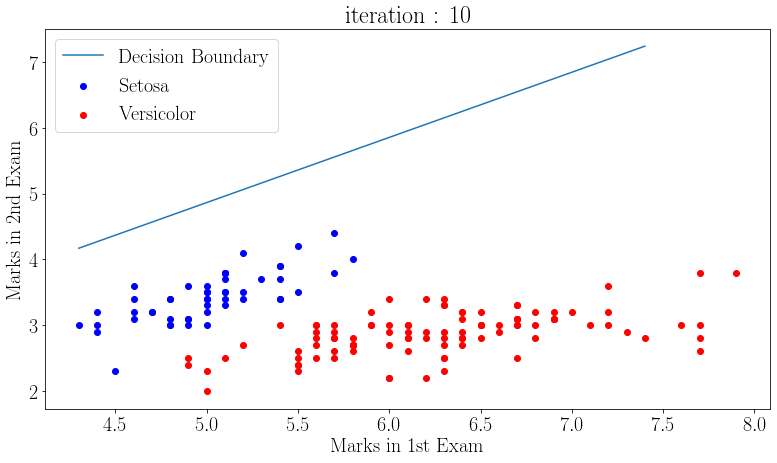

cost: 0.44058480743226935 	 weights: [-0.07832262  0.52072517 -0.69100994] 	


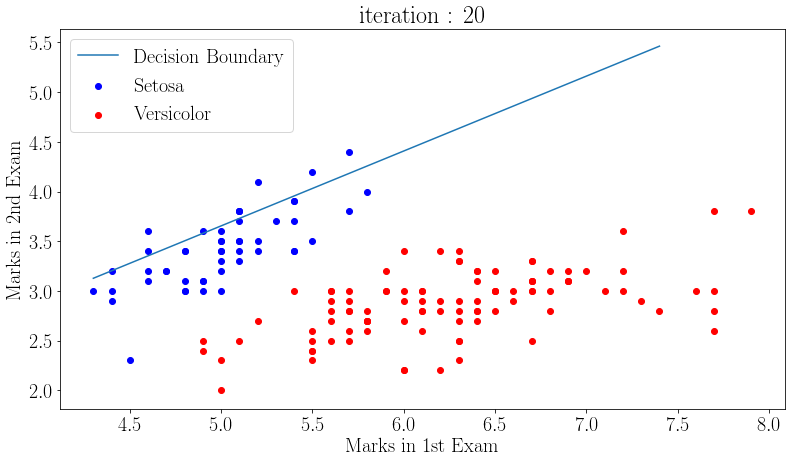

cost: 0.3868966442518758 	 weights: [-0.11624934  0.67906812 -0.97627552] 	


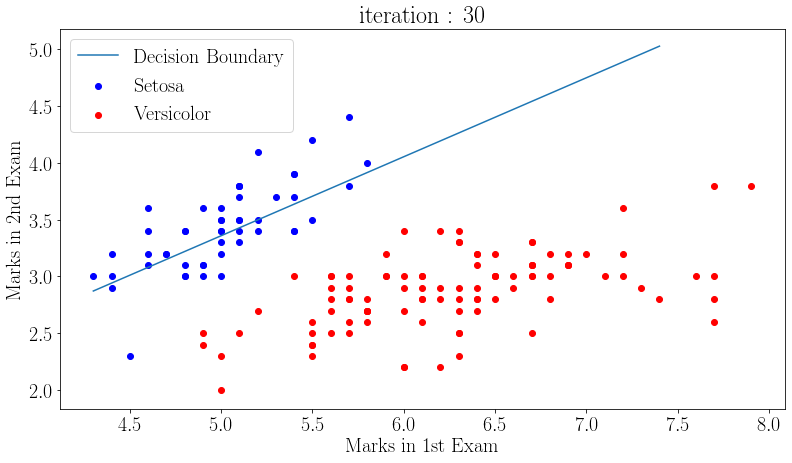

cost: 0.3452048262898703 	 weights: [-0.14999052  0.82115296 -1.2261953 ] 	


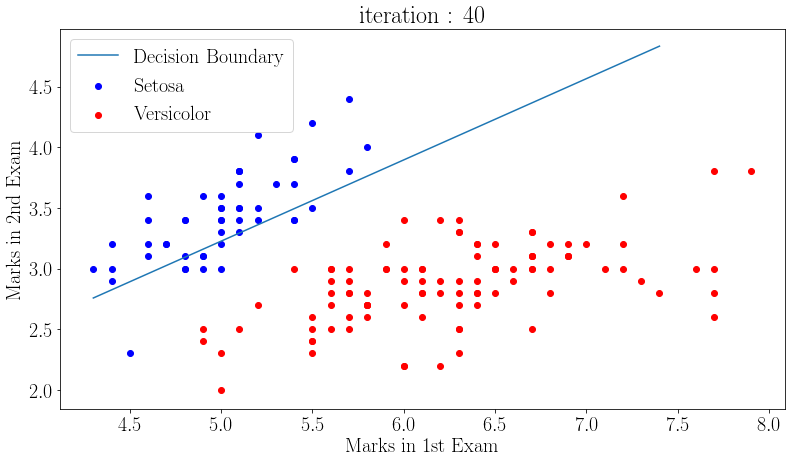

cost: 0.31214783489234765 	 weights: [-0.18059559  0.94840149 -1.44819557] 	


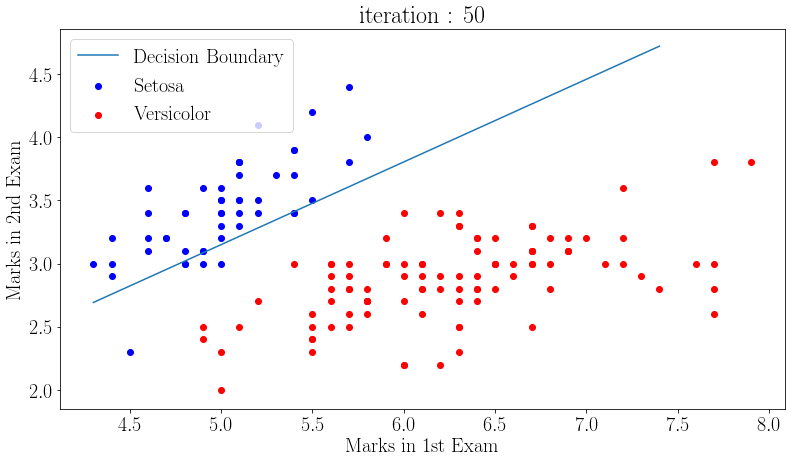

cost: 0.2854197531375354 	 weights: [-0.20865313  1.06328646 -1.64743407] 	


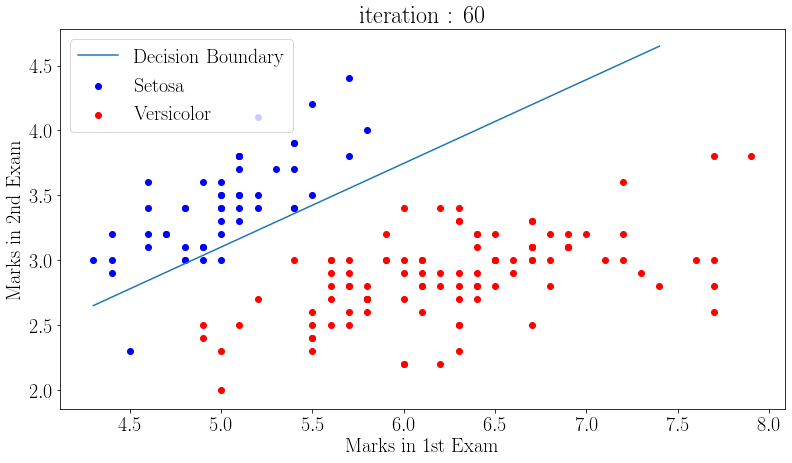

cost: 0.2634214128078192 	 weights: [-0.23460272  1.1678446  -1.82788937] 	


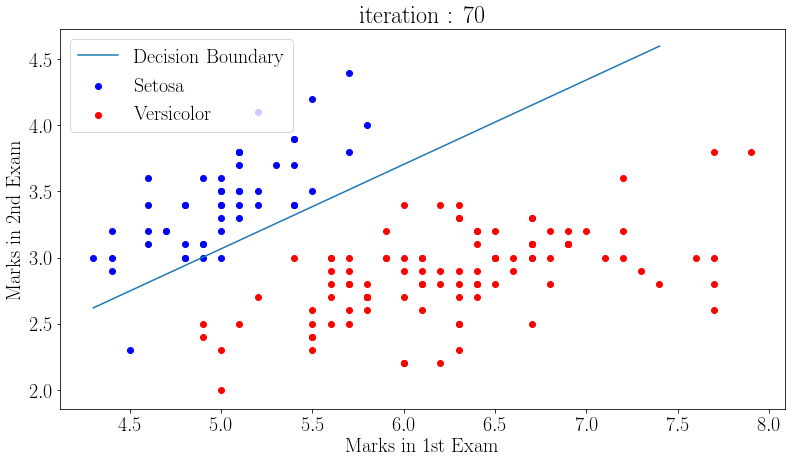

cost: 0.24502778177344103 	 weights: [-0.25878336  1.2636997  -1.99266088] 	


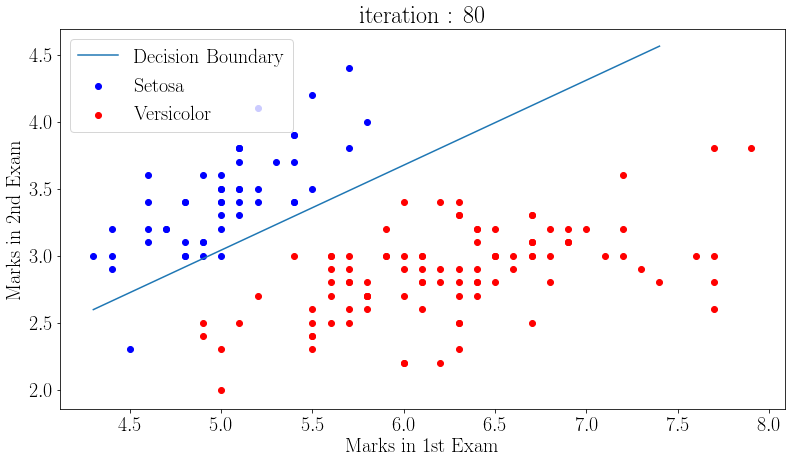

cost: 0.22943300607267067 	 weights: [-0.28146045  1.35214945 -2.14418414] 	


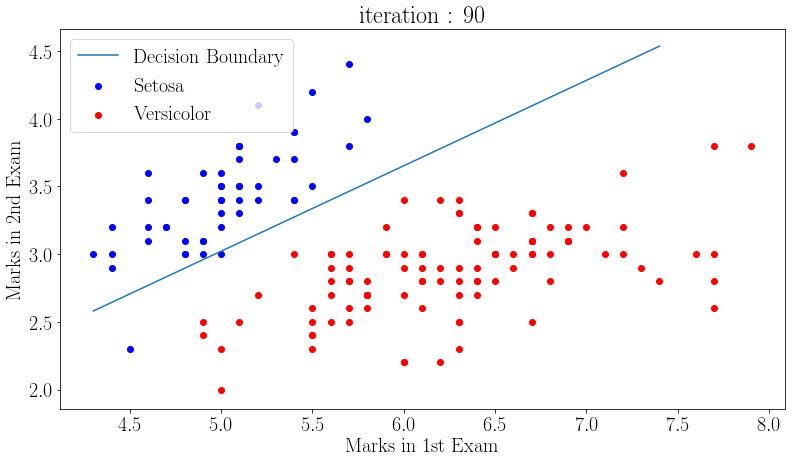

cost: 0.21604886675574766 	 weights: [-0.30284479  1.43423824 -2.2843942 ] 	


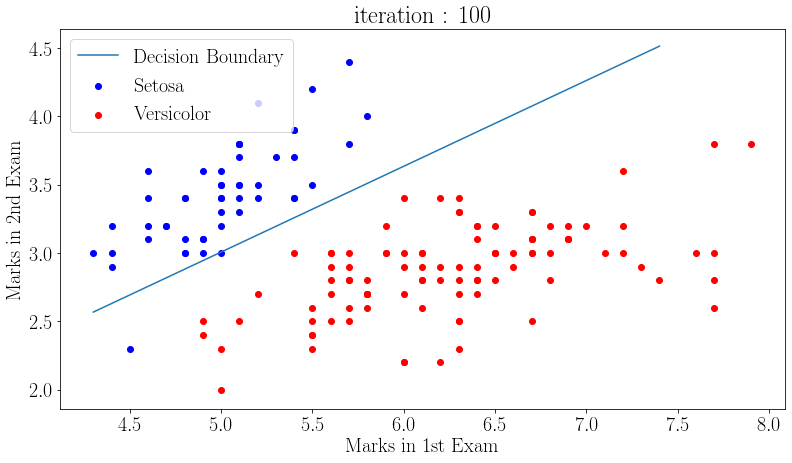

cost: 0.20443804321394385 	 weights: [-0.32310629  1.51081412 -2.41484644] 	


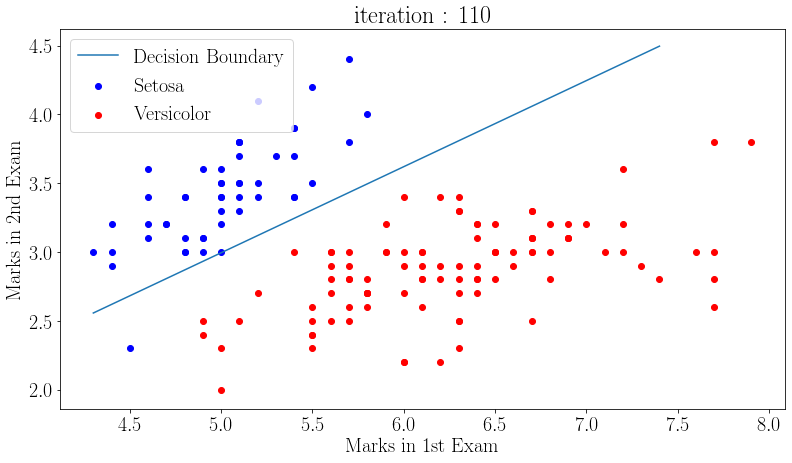

cost: 0.19426973205796938 	 weights: [-0.3423836   1.58257223 -2.53680555] 	


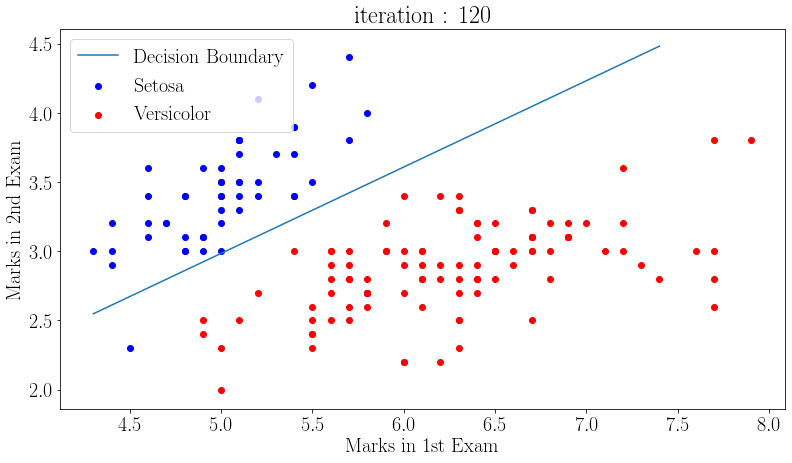

cost: 0.1852896680028266 	 weights: [-0.36079127  1.65008787 -2.65131123] 	


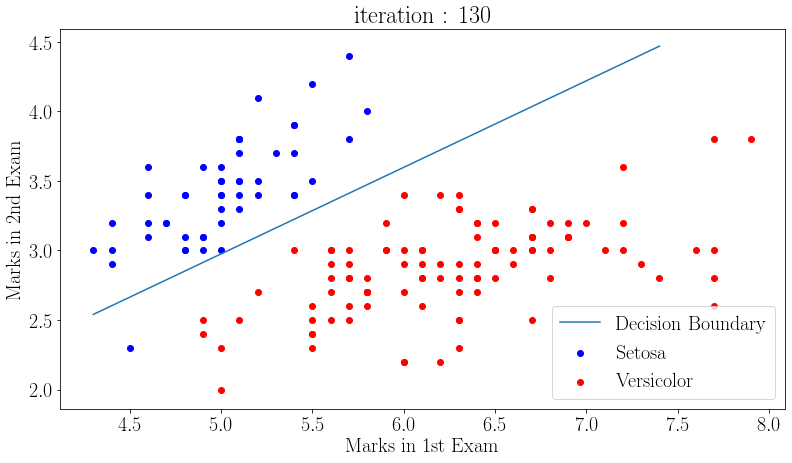

cost: 0.17729952635383975 	 weights: [-0.37842494  1.71384149 -2.75922698] 	


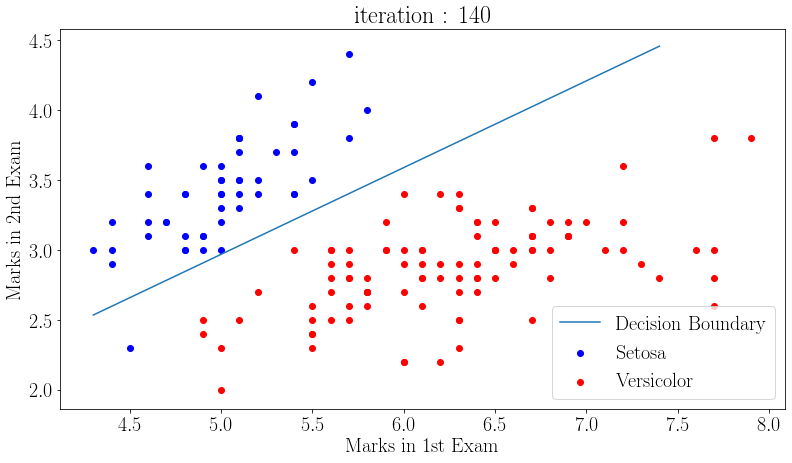

In [14]:
descent_dict,theta = gradient_descent(X,y,0.2,150)

Text(0, 0.5, 'Cost')

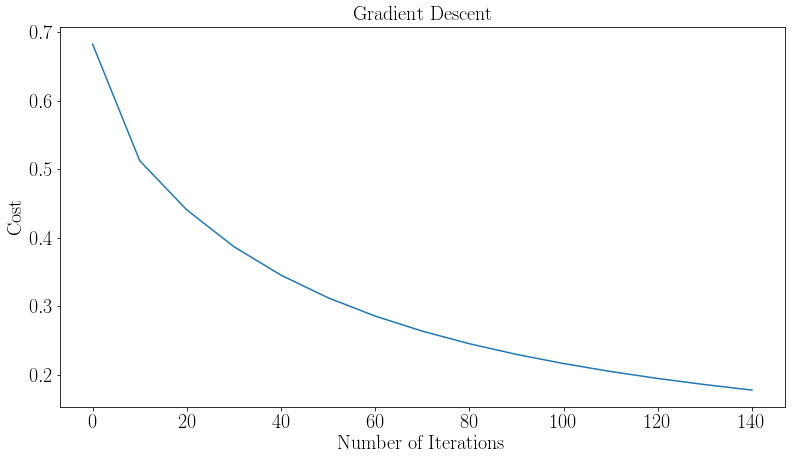

In [15]:
# Setting up variables
iterations = descent_dict.keys()
current_cost = descent_dict.values()

font = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        'size': 20,
        }

fig, ax = plt.subplots(figsize=(13,7))  
ax.plot(list(iterations), list(current_cost))
ax.set_title('Gradient Descent', fontdict=font)
ax.set_xlabel('Number of Iterations', fontdict=font)
ax.set_ylabel('Cost', fontdict=font)

In [16]:
descent_dict

{0: 0.682801866868683,
 10: 0.5125764419548847,
 20: 0.44058480743226935,
 30: 0.3868966442518758,
 40: 0.3452048262898703,
 50: 0.31214783489234765,
 60: 0.2854197531375354,
 70: 0.2634214128078192,
 80: 0.24502778177344103,
 90: 0.22943300607267067,
 100: 0.21604886675574766,
 110: 0.20443804321394385,
 120: 0.19426973205796938,
 130: 0.1852896680028266,
 140: 0.17729952635383975}

In [17]:
theta


array([-0.39370037,  1.76833908, -2.85131761])

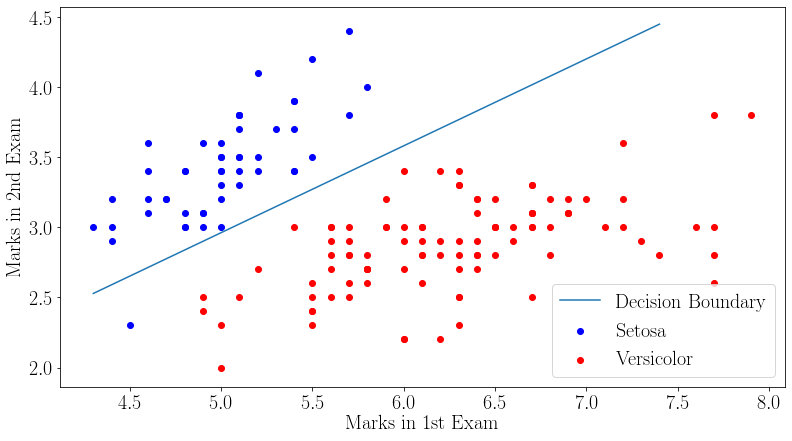

In [18]:
x_values = [np.min(X[:, 1] ), np.max(X[:, 2] +3)]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.figure(figsize=(13, 7))


plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='b', label='Setosa')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='r', label='Versicolor')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()